# Data Visualization and Analysis with New York Cuisine Dataset

Coded by Tyler Oh. Dataset from Kaggle (https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset)

The file contains 8 variables: order id, customer id, restaurant name, cuisine type, cost of each order, day of the week (weekend or weekday), rating (out of 5), food preparation time (by minutes), delivery time (by minustes).

## Motivation

Since the outbreak of COVID-19, technology and virtual industries such as Netflix and Zoom have rapidly risen and developed. Along with these, food delivery has become an essential part of our lives. Therefore, I believe that analyzing food delivery data can provide a great opportunity to improve my data analytical skills with a dataset that is significantly related to our daily lives. Also, we can determine which cuisines have the highest cost-effectiveness.

Here are some questions that we can answer through this analysis:

* Which cuisine types or restaurants are most frequently ordered?
* Which types of cuisine are the best in terms of ratings, price, etc.?
* When is the best time to order delivery food?
* What is the correlation between ratings and other variables?

In [24]:
# Importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Reading the dataset
food = pd.read_csv("/Users/tyler/Portfolio/NYC Food Ordering and Delivery/food_order.csv")

# Using info() to print a summary of the dataset
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [26]:
# Removing the variable "order_id"
food = food.iloc[:, 2:9]

In [27]:
# Checking NA values in the dataset
food.isnull().sum()

restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [28]:
food.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

There are some irregular restaurant names as follows:

* Big Wong Restaurant \x8c_¤¾Ñ¼
* Empanada Mama (closed)
* Joe's Shanghai \x8e_À\x8eü£¾÷
* Dirty Bird To Go (archived)
* CafÌ© China
* DespaÌ±a
* Chipotle Mexican Grill $1.99 Delivery

In [29]:
food['restaurant_name'] = food['restaurant_name'].replace('Big Wong Restaurant \x8c_¤¾Ñ¼','Big Wong Restaurant')
food['restaurant_name'] = food['restaurant_name'].replace('Empanada Mama (closed)','Empanada Mama')
food['restaurant_name'] = food['restaurant_name'].replace("Joe's Shanghai \x8e_À\x8eü£¾÷","Joe's Shanghai")
food['restaurant_name'] = food['restaurant_name'].replace('CafÌ© China','Cafe China')
food['restaurant_name'] = food['restaurant_name'].replace('Dirty Bird To Go (archived)','Dirty Bird To Go')
food['restaurant_name'] = food['restaurant_name'].replace('DespaÌ±a','Despaita')
food['restaurant_name'] = food['restaurant_name'].replace('Chipotle Mexican Grill $1.99 Delivery','Chipotle Mexican Grill')

In [30]:
food.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

In [31]:
# Checking cuisine_type
food.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [32]:
# Checking day_of_the_week
food.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

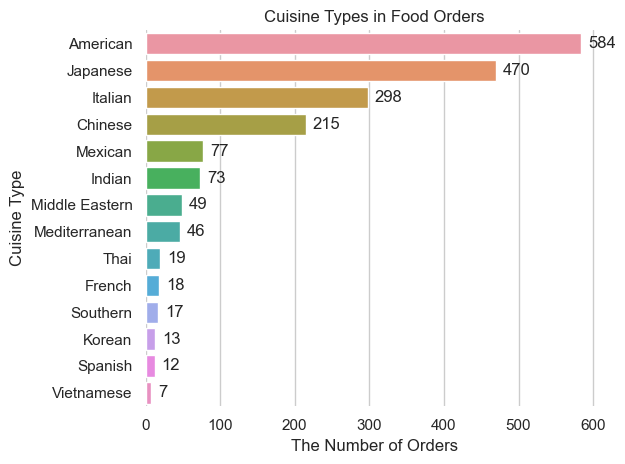

In [33]:
# Creating a new data frame to show counts of order by cuisine type
df_cuisine_type = pd.DataFrame(food["cuisine_type"].value_counts())
df_cuisine_type.reset_index(inplace=True)
df_cuisine_type.columns = ["Type", "Freq"]
df_cuisine_type = df_cuisine_type.sort_values(by="Freq", ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
hbars = sns.barplot(x="Freq", y="Type", data=df_cuisine_type, orient='h')
ax.bar_label(ax.containers[0], padding = 5)
plt.title('Cuisine Types in Food Orders')
ax.set(xlabel="The Number of Orders", ylabel="Cuisine Type")

sns.despine(left=True, right = True , top = True, bottom=True)
fig.tight_layout()

In [34]:
restaurant = food[["restaurant_name"]]

count_restaurant = restaurant.groupby("restaurant_name").value_counts().reset_index(name="count")
count_top10 = count_restaurant.sort_values(by="count",ascending=False).head(10)
count_top10

,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68
121,RedFarm Broadway,59
122,RedFarm Hudson,55
145,TAO,49
66,Han Dynasty,46
22,Blue Ribbon Sushi Bar & Grill,44


In [36]:
# Creating a new data frame containig only 5 stars restaurants
rate_by_restaurant = food[["restaurant_name","rating"]]
rate_by_restaurant = rate_by_restaurant[rate_by_restaurant['rating'].str.contains('\d')]

full_restaurant = rate_by_restaurant[rate_by_restaurant["rating"] == "5"]

# Showing 5 stars restaurant name and its counts
top10_by_rate = full_restaurant.groupby("restaurant_name")["rating"].value_counts().reset_index(name="count")
top10_by_rate = top10_by_rate.sort_values(by="count",ascending=False).head(10)
top10_by_rate

,restaurant_name,rating,count
91,Shake Shack,5,60
103,The Meatball Shop,5,53
15,Blue Ribbon Sushi,5,32
14,Blue Ribbon Fried Chicken,5,32
81,RedFarm Broadway,5,18
82,RedFarm Hudson,5,15
16,Blue Ribbon Sushi Bar & Grill,5,15
75,Parm,5,14
46,Han Dynasty,5,13
98,TAO,5,13


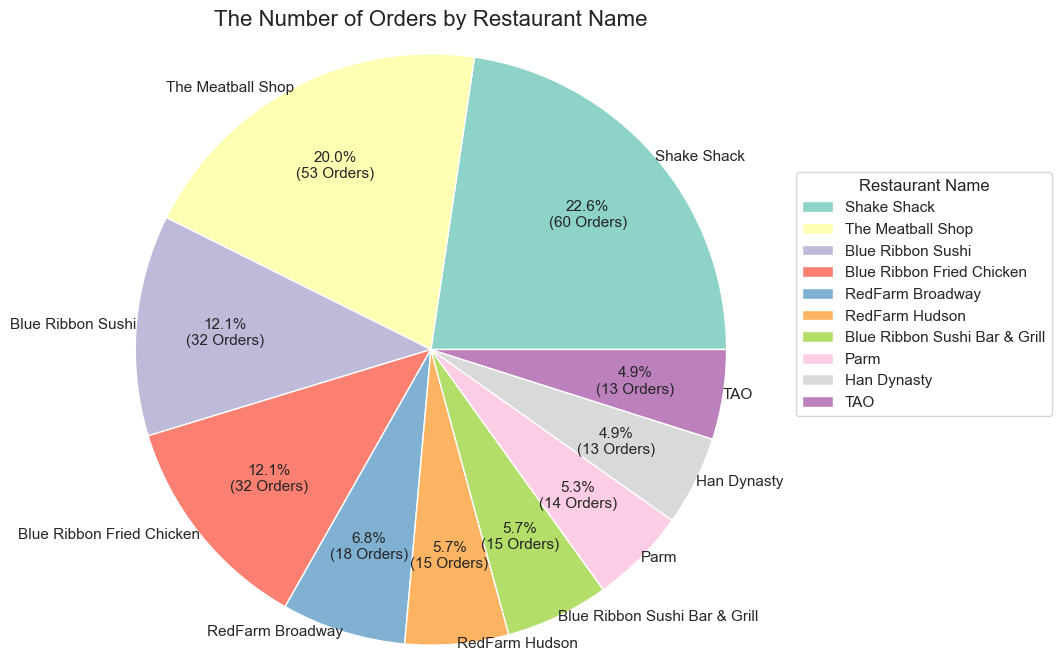

In [37]:
top10 = (count_top10["count"].sum()) / (count_restaurant["count"].sum())

plt.title(
    label="The Number of Orders by Restaurant Name", 
    fontdict={"fontsize":16},
    pad=100
)

plt.pie(top10_by_rate["count"], 
        labels=top10_by_rate["restaurant_name"],
        pctdistance = 0.7, 
        labeldistance = 1,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(top10_by_rate["count"]):.0f} Orders)',
        textprops={"family": "Arial", "size": 11},
        radius = 2,
        colors=sns.color_palette('Set3')
        )
plt.legend(loc="best", bbox_to_anchor=(2.2,1), title="Restaurant Name")

The top 10 restaurants by order volume account for 46.73 % of 887 orders in total.

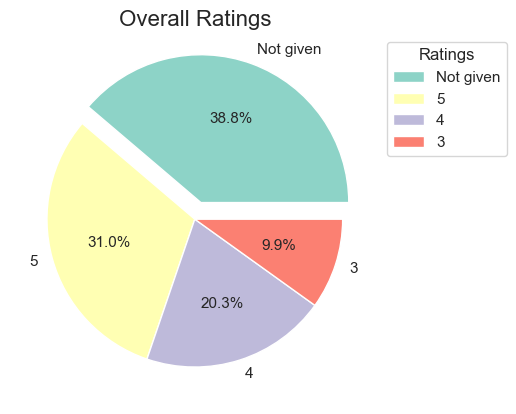

In [38]:
# Creating a new data frame restaurants by ratings and pie charts of counts of ratings
food_rating = pd.DataFrame(food["rating"].value_counts()).reset_index()

plt.title(label="Overall Ratings", 
    fontdict={"fontsize":16})

plt.pie(food_rating["rating"], 
        labels=food_rating["index"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        explode=[0.12, 0, 0, 0]
        )
plt.legend(loc="best", bbox_to_anchor=(1,1), title="Ratings")
fig.tight_layout()

In [45]:
food["food_to_home_time"] = food[["food_preparation_time", "delivery_time"]].sum(axis=1, skipna=True)

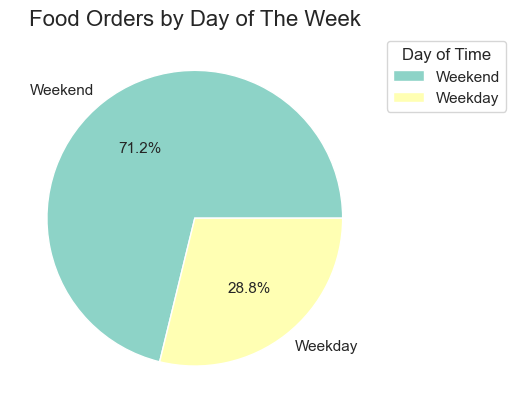

In [46]:
# Creating a new data frame to show food orders by day_of_the_week
df_day = pd.DataFrame(food["day_of_the_week"].value_counts())
df_day.reset_index(inplace=True)
df_day.columns = ["Day", "Freq"]
df_day = df_day.sort_values(by="Day", ascending=False)
plt.title(label="Food Orders by Day of The Week", 
    fontdict={"fontsize":16})

plt.pie(df_day["Freq"], labels = df_day["Day"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1), title="Day of Time")
fig.tight_layout()

Order volume is much higher on weekends (two days) than on weekdays (five days).

In [47]:
# Mean rating of each type of cuisine
mean_rating = food[["cuisine_type", "rating"]].dropna()
mean_rating = mean_rating[mean_rating['rating'].str.contains('\d')]

mean_rating["rating"] = pd.to_numeric(mean_rating["rating"])
mean_rating = mean_rating.groupby("cuisine_type")["rating"].mean().reset_index()
mean_rating = mean_rating.sort_values('rating', ascending=[False])
mean_rating

,cuisine_type,rating
11,Spanish,4.833333
12,Thai,4.666667
3,Indian,4.540000
8,Mexican,4.416667
5,Japanese,4.373626
4,Italian,4.360465
1,Chinese,4.338346
10,Southern,4.307692
2,French,4.300000
0,American,4.298913


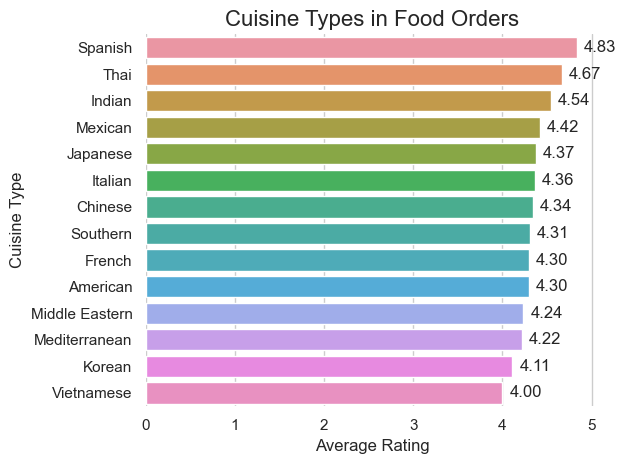

In [48]:
# Bar chart of average ratings by cuisine types
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="rating", y="cuisine_type", data=mean_rating)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title('Cuisine Types in Food Orders', fontdict={"fontsize":16})
ax.set(xlabel="Average Rating", ylabel="Cuisine Type")

sns.despine(left=True, right = True , top = True, bottom=True)
fig.tight_layout()

Spanish, Thai, and Indian cuisines have the highest mean ratings, in that order.

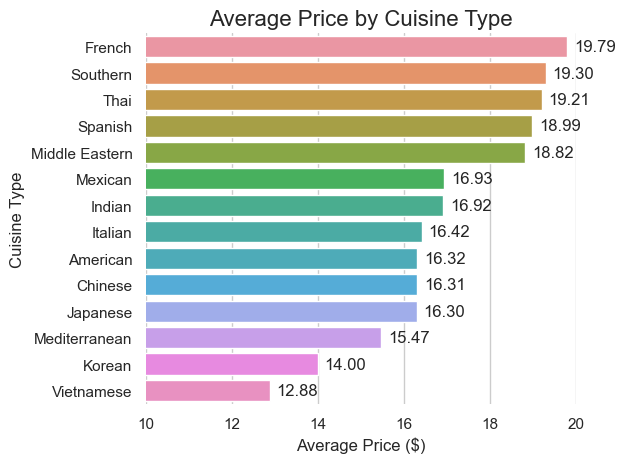

In [49]:
# Average price of each order by cuisine type
mean_price = food[["cuisine_type","cost_of_the_order"]]
mean_price_by_type = mean_price.groupby("cuisine_type")["cost_of_the_order"].mean().reset_index()
mean_price_by_type = mean_price_by_type.sort_values("cost_of_the_order", ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="cost_of_the_order", y="cuisine_type", data=mean_price_by_type)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title("Average Price by Cuisine Type", fontdict={"fontsize":16})
ax.set(xlabel="Average Price ($)", ylabel="Cuisine Type", xlim=(10,20))

sns.despine(left=True, right=True, top=True, bottom=True)
fig.tight_layout()

French, Southern, Thai, Spanish and Middle Eastern foods are relatively high average price.

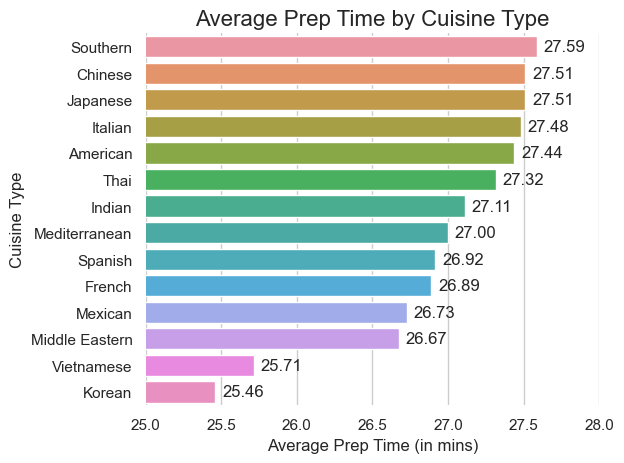

In [50]:
# Average prep time of each order by cuisine type
prep_time = food[["cuisine_type","food_preparation_time"]]
mean_prep_time = prep_time.groupby("cuisine_type")["food_preparation_time"].mean().reset_index()
mean_prep_time = mean_prep_time.sort_values("food_preparation_time",ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="food_preparation_time", y="cuisine_type", data=mean_prep_time)
ax.bar_label(ax.containers[0], padding = 5, fmt='%.2f')
plt.title("Average Prep Time by Cuisine Type", fontdict={"fontsize":16})
ax.set(xlabel="Average Prep Time (in mins)", ylabel="Cuisine Type", xlim=(25,28))

sns.despine(left=True, right=True, top=True, bottom=True)
fig.tight_layout()

There is little difference in cooking time between Korean and Vietnamese food, with both being faster than Southern food.

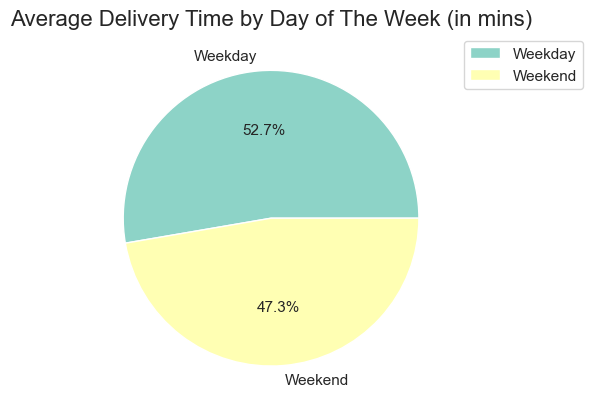

In [51]:
# Creating a new data frame containing average delivery time by day_of_the_week
time_by_day = food[["day_of_the_week", "food_to_home_time"]]
mean_delivery = time_by_day.groupby("day_of_the_week")["food_to_home_time"].mean().reset_index()
mean_delivery["food_to_home_time"] = mean_delivery["food_to_home_time"].round(1)

plt.title(label="Average Delivery Time by Day of The Week (in mins)", 
    fontdict={"fontsize":16})

plt.pie(mean_delivery["food_to_home_time"], labels = mean_delivery["day_of_the_week"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1))
fig.tight_layout()

Delivery time is approximately 5 minutes faster on weekends than on weekdays.
Also, 12.91 %  of restaurant orders take more than an hour to deliver.

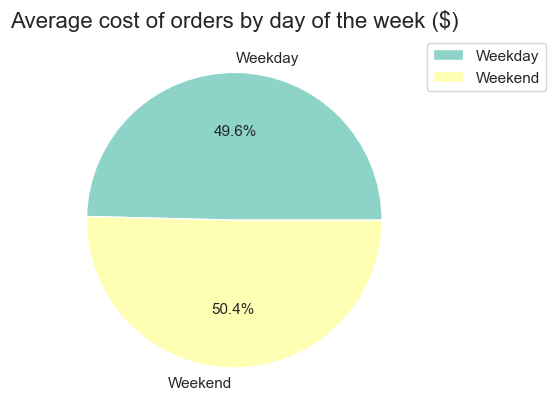

In [52]:
# Creating a new data frame containing average cost of orders by day_of_the_week
cost_by_week = food[["day_of_the_week", "cost_of_the_order"]]
mean_cost_week = cost_by_week.groupby("day_of_the_week")["cost_of_the_order"].mean().reset_index()
mean_cost_week["cost_of_the_order"] = mean_cost_week["cost_of_the_order"].round(2)

plt.title(label="Average cost of orders by day of the week ($)", 
    fontdict={"fontsize":16})

plt.pie(mean_cost_week["cost_of_the_order"], labels = mean_cost_week["day_of_the_week"],
        pctdistance = 0.6, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set3'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1))
fig.tight_layout()

The difference in customer spending depending on the day of the week is small.

<AxesSubplot:>

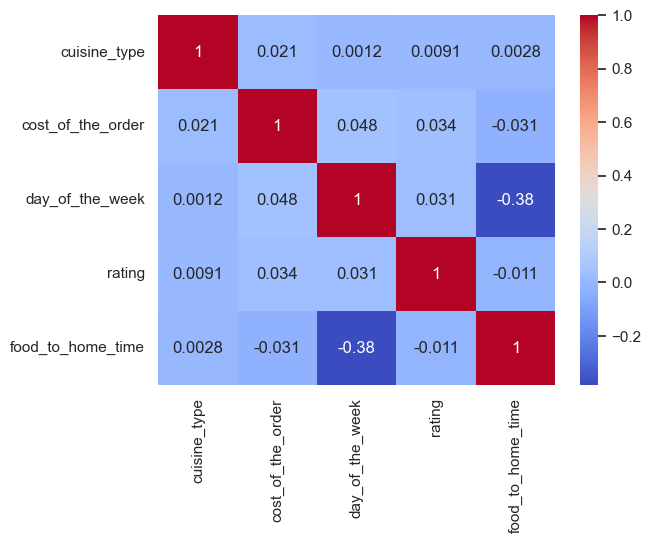

In [53]:
# Correlation of each variables
food_corr = food.copy()
food_corr = food_corr[food_corr['rating'].str.contains('\d')]
food_corr["rating"] = pd.to_numeric(food_corr["rating"])
food_corr.dropna(inplace=True)

food_corr = food_corr.iloc[:, [1,2,3,4,7]]

food_corr["day_of_the_week"] = pd.factorize(food_corr["day_of_the_week"])[0]
food_corr["cuisine_type"] = pd.factorize(food_corr["cuisine_type"])[0]

corr = food_corr.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

## Conclusion

The analysis of food delivery data in NYC using Python revealed several interesting insights.
First of all, the top 10 restaurants with the highest orders accounted for 46.73% of the total orders, indicating that a few popular restaurants dominate the food delivery market. Moreover, these restaurants tend to have high ratings, suggesting that customers prefer to order from highly-rated restaurants.

Another surprising finding was that the order volume was significantly higher on weekends compared to weekdays. This may indicate that more people prefer to order food on weekends, possibly due to a lack of time or the desire to treat themselves after a busy week.
Furthermore, the analysis found that Spanish, Thai, and Indian cuisines have the highest mean ratings, indicating that customers tend to be more satisfied with these cuisines. However, it is important to note that 38.8% of customers do not give a star rating, which could indicate that many customers do not rate their satisfaction.

The cooking time for Korean and Vietnamese food was found to be remarkably short, with a difference of only two minutes compared to Southern food, which takes the longest. This suggests that there is no significant difference in cooking time between different cuisines.
Additionally, on weekends, the average time for food to reach customers was about five minutes shorter than during the week. This could be due to office workers doing delivery on weekends as a side job. However, it is also important to note that 12.91% of restaurants' foods were delivered after more than an hour.
Finally, the analysis found that American, Japanese, and Italian foods were the most popular foods for delivery, including Shake Shack burgers, The Meatball Shop, and Blue Ribbon Sushi. This could indicate that customers prefer fast-foods and sushi.
In conclusion, this analysis provides valuable insights into the food delivery market in NYC. However, it is important to note that the findings are based on a limited dataset especially in ratings. Hence, further research is needed to confirm these insights.